# HW3

Consider:
$$
(u_{xx}+u_{yy}) = 0~~for~~0\leq x,~ y\leq 2\pi
$$
With the following boundary condition
$$
\begin{align}
& u(0,y)=0\\
& u(2\pi,y)=0\\
& u(x,0)=\sin(2x)+\sin(5x)+\sin(7x)\\
& u(x,2\pi)=0
\end{align}
$$
For the general Laplacian problem (2D):
$$
\Delta u = f
$$
Its finite difference form:
$$
\frac{u_{i+1,j}-2u_{i,j}+u_{i-1,j}}{\Delta x^2}+\frac{u_{i,j+1}-2u_{i,j}+u_{i,j-1}}{\Delta y^2} = f_{i,j}
$$
Jacobi iterative sheme:
$$
u_{i,j}^{n+1}=\frac{1}{4}[u_{i+1,j}^{n}+u_{i-1,j}^{n}+u_{i,j+1}^{n}+u_{i,j-1}^{n}-h^2f_{i,j}]
$$
Gauss-Seidel iterative scheme:
$$
u_{i,j}^{n+1}=\frac{1}{4}[u_{i+1,j}^{n}+u_{i-1,j}^{n+1}+u_{i,j+1}^{n}+u_{i,j-1}^{n+1}-h^2f_{i,j}]
$$


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dx = 2*np.pi/20
dy = 2*np.pi/20
x = np.arange(0, 2*np.pi+dx, dx)
y = np.arange(0, 2*np.pi+dy, dy)
x.max(), y.max()

(6.283185307179586, 6.283185307179586)

In [3]:
mesh1 = np.zeros((len(x), len(y)))
# B.C.
mesh1[0] = 0
mesh1[-1] = 0
mesh1[:,0] = np.sin(2*x)+np.sin(5*x)+np.sin(7*x)
mesh1[:,-1] = 0

mesh2 = mesh1.copy()
mesh3 = mesh1.copy()

In [5]:
# Jacobi
max_iter = 200
for _ in range(max_iter):
    mesh1[1:-1,1:-1] = 0.25*(mesh1[:-2,1:-1]+mesh1[2:,1:-1]+mesh1[1:-1,:-2]+mesh1[1:-1,2:])

# Gauss-Seidel
for _ in range(max_iter):
    for i in range(1, len(x)-1):
        for j in range(1, len(y)-1):
            mesh2[i,j] = 0.25*(mesh2[i-1,j]+mesh2[i+1,j]+mesh2[i,j-1]+mesh2[i,j+1])

# SOR
omega = 1.5
for _ in range(max_iter):
    for i in range(1, len(x)-1):
        for j in range(1, len(y)-1):
            mesh3[i,j] = (1-omega)*mesh3[i,j]+omega*0.25*(mesh3[i-1,j]+mesh3[i+1,j]+mesh3[i,j-1]+mesh3[i,j+1])

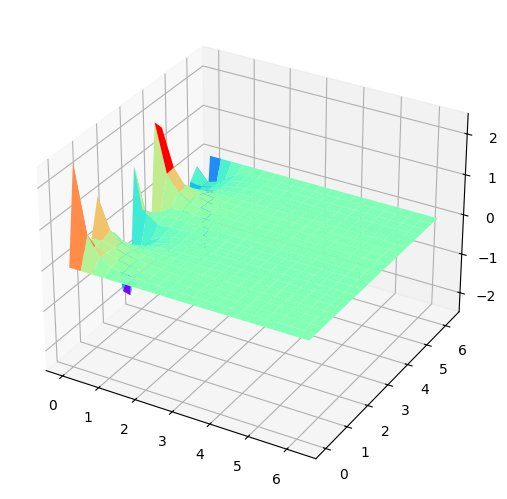

In [26]:
x = np.arange(0, 2*np.pi+dx, dx)
y = np.arange(0, 2*np.pi+dy, dy)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
# 创建3d图形的两种方式
# 将figure变为3d
ax = Axes3D(fig,auto_add_to_figure=False)
fig.add_axes(ax)
# plt.imshow(mesh1)
ax.plot_surface(X, Y, mesh1, rstride = 1, cstride = 1, cmap = plt.get_cmap('rainbow'))

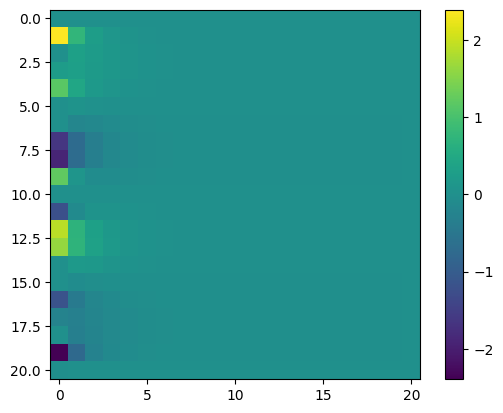

In [19]:
plt.imshow(mesh1)
plt.colorbar()